<a href="https://colab.research.google.com/github/AdaChen1130/Ecommerce-affecting-brickandmortar-retail/blob/main/Data_analysis_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


#Literature

#Assumptions


#Return calculation

# Results

##Data Preprocessing


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm



In [26]:
# Clear data


df = pd.read_excel('NBS_merged.xlsx')

df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)
df.drop('Oct 2023', axis=1, inplace=True)


print(df.head())


                                          Indicators  Sep 2023  Aug 2023  \
0  Total Retail Sales of Consumer Goods, Current ...   39826.0   37932.7   
1  Total Retail Sales of Consumer Goods, Growth R...       5.5       4.6   
2  Retail Sales of Consumer Goods of Enterprises ...   15890.3   14460.8   
3  Retail Sales of Consumer Goods of Enterprises ...       5.2       3.1   
4  Note:Figures of total retail sales of consumer...       0.0       0.0   

   Jul 2023  Jun 2023  May 2023  Apr 2023  Mar 2023  Feb 2023  Jan 2023  ...  \
0   36760.7   39951.4   37803.3   34910.5   37855.4       0.0       0.0  ...   
1       2.5       3.1      12.7      18.4      10.6       0.0       0.0  ...   
2   13762.0   16658.3   14033.4   13228.1   15459.1       0.0       0.0  ...   
3       0.3       2.3      12.5      19.0      10.1       0.0       0.0  ...   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  ...   

   Oct 2019  Sep 2019  Aug 2019  Jul 2019  Jun 2019  May 2019 

##Total Sales Pattern


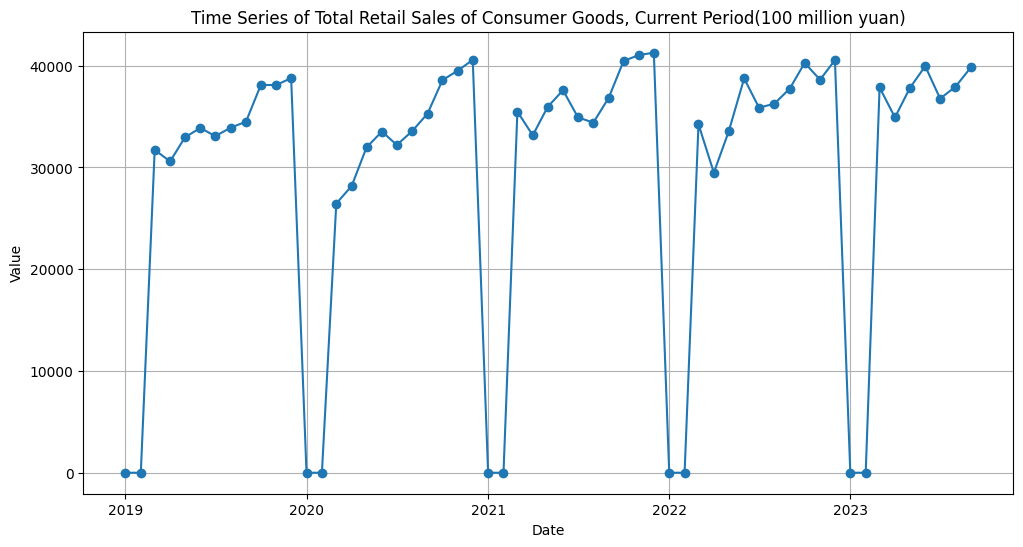

In [5]:
# Transposing the dataset for easier plotting
data_transposed = df.set_index('Indicators').T
data_transposed.index = pd.to_datetime(data_transposed.index)

# Selecting an indicator for visualization
# Example: 'Total Retail Sales of Consumer Goods, Current Period(100 million yuan)'

total_sales_indicator = 'Total Retail Sales of Consumer Goods, Current Period(100 million yuan)'

# Plotting total sales
plt.figure(figsize=(12, 6))
plt.plot(data_transposed[total_sales_indicator], marker='o')  # Added markers for clarity
plt.title(f'Time Series of {total_sales_indicator}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

## Online Sales Pattern

In [6]:
# Filter Online Sales
online_sales_indicator = "Online Retail Sales in Goods, Accumulated(100 million yuan)"
online_sales_data = df[df['Indicators'] == online_sales_indicator]

online_sales_data = online_sales_data.drop(columns=['Indicators']).T
online_sales_data.columns = ['Accumulated Sales']
online_sales_data.index.name = 'Month'
online_sales_data = online_sales_data[::-1]

# Convert to date
online_sales_data.index = pd.to_datetime(online_sales_data.index, errors='coerce')

In [7]:
# Calculate diff from accumulated data
online_monthly_sales = online_sales_data['Accumulated Sales'].diff().fillna(online_sales_data['Accumulated Sales'])
online_monthly_sales[online_monthly_sales < 0] = online_sales_data['Accumulated Sales']

# Create line plot
fig = px.line(online_monthly_sales, labels={'value': 'Online Retail Sales (in 100 million yuan)', 'Month': 'Month'},
              title='Monthly Online Retail Sales in Goods')

fig.show()

# Save
# fig.write_image('monthly_online_retail_sales.png')


##In Store Sales Pattern

In [8]:
# Identifying the rows for the required calculations
total_retail_sales_row = df[df['Indicators'].str.contains("Total Retail Sales of Consumer Goods, Accumulated", na=False)]
online_retail_sales_row = df[df['Indicators'].str.contains("Online Retail Sales in Goods, Accumulated", na=False)]

# Checking if the rows are correctly identified
total_retail_sales_row, online_retail_sales_row


(                                           Indicators  Sep 2023  Aug 2023  \
 69  Total Retail Sales of Consumer Goods, Accumula...  342107.0  302281.0   
 70  Total Retail Sales of Consumer Goods, Accumula...       6.8       7.0   
 
     Jul 2023  Jun 2023  May 2023  Apr 2023  Mar 2023  Feb 2023  Jan 2023  ...  \
 69  264348.4  227587.6  187636.3  149832.9  114922.4   77067.0  38533.50  ...   
 70       7.3       8.2       9.3       8.5       5.8       3.5      1.75  ...   
 
     Oct 2019  Sep 2019  Aug 2019  Jul 2019  Jun 2019  May 2019  Apr 2019  \
 69  334778.5  296674.2  262179.3  228282.9  195209.7  161331.6  128375.8   
 70       8.1       8.2       8.2       8.3       8.4       8.1       8.0   
 
     Mar 2019  Feb 2019  Jan 2019  
 69   97789.7   66064.0   33032.0  
 70       8.3       8.2       4.1  
 
 [2 rows x 58 columns],
                                             Indicators  Sep 2023  Aug 2023  \
 146  Online Retail Sales in Goods, Accumulated(100 ...   90435.0   79

In [9]:
# Selecting the specific rows for total and online retail sales (ignoring growth rates or other metrics)
total_retail_sales = total_retail_sales_row.iloc[0]  # Assuming the first row is the correct one
online_retail_sales = online_retail_sales_row.iloc[0]  # Assuming the first row is the correct one

# Calculating the difference to get in-store retail sales
in_store_retail_sales = total_retail_sales[1:] - online_retail_sales[1:]

# Preparing the new row to be added
new_row = pd.DataFrame(data=[["In Store Retail Sales of Consumer Goods, Accumulated (100 million yuan)"] + list(in_store_retail_sales)], columns=df.columns)

# Adding the new row to the dataset
df = pd.concat([df, new_row], ignore_index=True)

# Display the new row and a few rows of the updated dataset to confirm the addition
df.tail(1)  # Displaying the last few rows to include the new addition


,Indicators,Sep 2023,Aug 2023,Jul 2023,Jun 2023,May 2023,Apr 2023,Mar 2023,Feb 2023,Jan 2023,...,Oct 2019,Sep 2019,Aug 2019,Jul 2019,Jun 2019,May 2019,Apr 2019,Mar 2019,Feb 2019,Jan 2019
148,"In Store Retail Sales of Consumer Goods, Accum...",251672.0,222460.4,194492.3,166964.9,139581.6,112668.6,87087.3,59591.4,29795.7,...,269606.3,238897.3,211433.8,184049.6,157044.8,130917.1,104442.6,80017.7,55163.0,27581.5


In [10]:
# Filter In Store Sales
instore_sales_indicator = "In Store Retail Sales of Consumer Goods, Accumulated (100 million yuan)"
instore_sales_data = df[df['Indicators'] == instore_sales_indicator]

instore_sales_data = instore_sales_data.drop(columns=['Indicators']).T
instore_sales_data.columns = ['Accumulated Sales']
instore_sales_data.index.name = 'Month'
instore_sales_data = instore_sales_data[::-1]

# Convert to date
instore_sales_data.index = pd.to_datetime(instore_sales_data.index, errors='coerce')

In [11]:
# Calculate diff from accumulated data
instore_monthly_sales = instore_sales_data['Accumulated Sales'].diff().fillna(instore_sales_data['Accumulated Sales'])
instore_monthly_sales[instore_monthly_sales < 0] = instore_sales_data['Accumulated Sales']

# Create line plot
fig = px.line(instore_monthly_sales, labels={'value': 'In store Retail Sales (in 100 million yuan)', 'Month': 'Month'},
              title='Monthly in store Retail Sales in Goods')

fig.show()

# Save
# fig.write_image('monthly_instore_retail_sales.png')

# Statistics Analysis

##Seasonal analysis

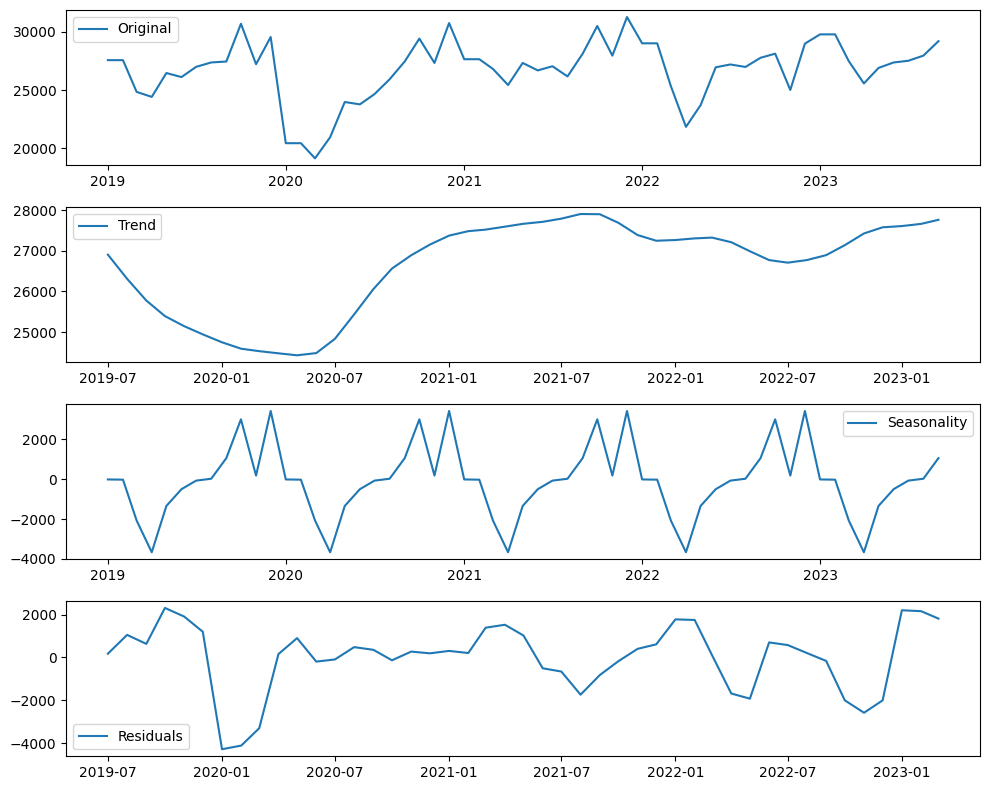

In [12]:
# seasonal analysis for in store monthly sales

decomposition = sm.tsa.seasonal_decompose(instore_monthly_sales, model='additive', period=12)
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Original Data: This represents the raw monthly sales data for in-store retail. The graph shows fluctuations that could be attributed to factors such as market demand, promotional activities, or seasonal influences.

Trend: This line reveals the long-term trend in the data, abstracting away from seasonal effects and other irregular influences. The trend component shows a decline in early 2020, which may be associated with the COVID-19 pandemic, followed by a gradual recovery and an upward trajectory.

Seasonality: This line uncovers the seasonal patterns in the data, which are regular fluctuations that occur within a year. The graph indicates that sales demonstrate regular increases or decreases in certain months, suggesting that sales are affected by seasonal factors.

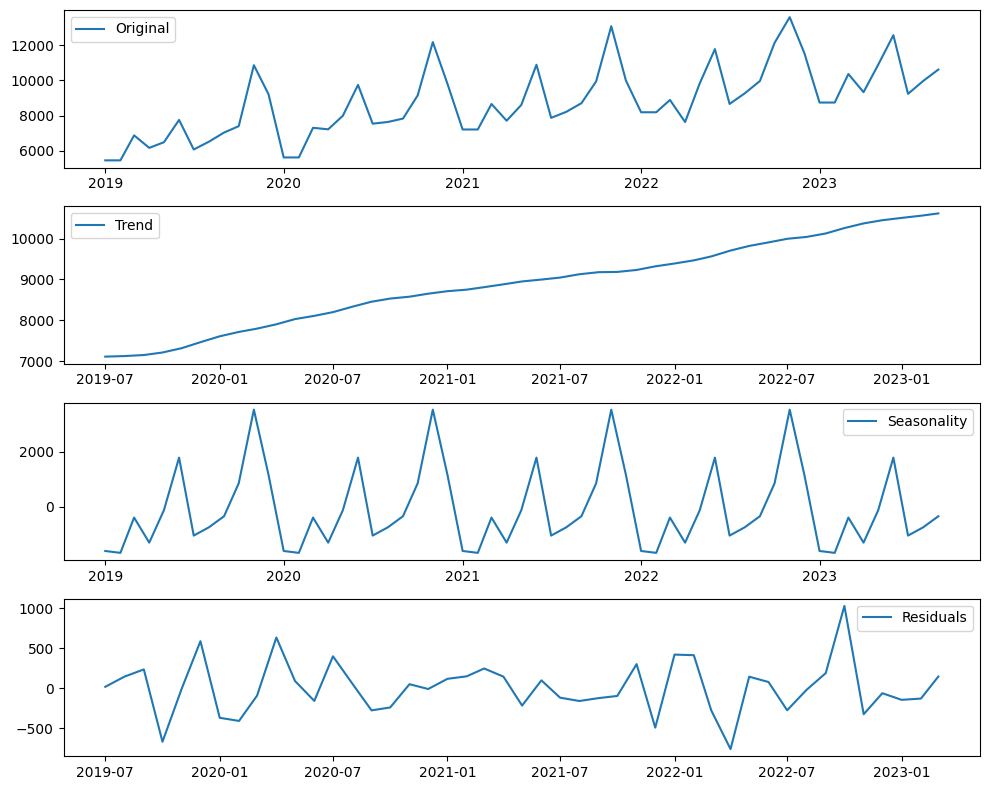

In [13]:

decomposition = sm.tsa.seasonal_decompose(online_monthly_sales, model='additive', period=12)
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Original data: This top chart shows recorded monthly online sales data. Peaks and troughs indicate changes in sales over time. Near the end of each year, online sales will be higher, which may be due to the e-commerce promotions in November and December every year.
Trend Component : The second graph displays the trend component, smoothing out the irregularities and seasonal variations to show the long-term progression in the data. It shows a generally upward trend, suggesting a steady increase in online sales over the years. This could reflect the overall growth of e-commerce.
Seasonal Component : The third graph reveals the seasonality in the data, which are patterns that repeat at regular intervals within the year. This could include higher sales during certain holidays or sales events. The consistent peaks and troughs each year suggest that certain times of the year are predictably higher or lower in sales, which is typical for retail due to events like Black Friday, Christmas, or other seasonal promotions.


## Hypothesis test

First, test the variance of the two sets of sample data: online_monthly_sales and instore_monthly_sales. At a significance level of 0.05, use the Levene statistic to determine whether the variances are equal based on the p value. If the p-value is less than the significance level, the variances of the two sets of data are considered to be unequal, and vice versa.

In [20]:
from scipy.stats import levene

statistic, p_value = levene(online_monthly_sales, instore_monthly_sales)
print(f'Levene Statistics: {statistic}, p_value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis of equal variances and consider that the variances of the two sets of data are not equal.')
else:
    print('Fail to reject the null hypothesis of equal variance, and the variances of the two sets of data are considered to be equal.')


Levene Statistics: 0.6410067116098597, p_value: 0.42504157050096525
Fail to reject the null hypothesis of equal variance, and the variances of the two sets of data are considered to be equal.


Then, conduct a t test on the two sets of data, online_monthly_sales and instore_monthly_sales, to compare the means of sales. Choose a significance level of 0.05. If the test p-value is less than the significance level, the null hypothesis is rejected and there is no significant difference in the means of the two sets of sales data, and vice versa.

In [21]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(online_monthly_sales, instore_monthly_sales, equal_var=False)
print(f't statistics: {t_stat}, p_value: {p_val}')

alpha = 0.05
if p_val < alpha:
    print('The null hypothesis is rejected, there is a significant difference.')
else:
    print('The null hypothesis cannot be rejected, there is insufficient evidence to suggest a significant difference.')

t statistics: -41.477883180273004, p_value: 1.0659906776480866e-66
The null hypothesis is rejected, there is a significant difference.


## Regression analysis

In [25]:
import statsmodels.api as sm

X = online_monthly_sales
y = instore_monthly_sales

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Accumulated Sales   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     6.669
Date:                Tue, 21 Nov 2023   Prob (F-statistic):             0.0125
Time:                        15:44:12   Log-Likelihood:                -525.45
No. Observations:                  57   AIC:                             1055.
Df Residuals:                      55   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.295e+04   1510.84

The regression output provides various statistics about the relationship between online monthly sales (x) and in-store monthly sales (y).

The R-squared value is 0.108, meaning that approximately 10.8% of the variability in in-store sales can be explained by the variability in online sales. This is a relatively low value, suggesting that online sales are not a strong predictor of in-store sales.

The F-statistic is 6.669 with a p-value of 0.0125. This suggests that the model is statistically significant at a common alpha level of 0.05, meaning there is a statistically significant relationship between online and in-store sales.

Coefficients:
The intercept is approximately 22,950 with a p-value of 0.000, indicating that it is statistically significant. This value represents the expected in-store sales when online sales are zero.
The coefficient for online sales is 0.4333 with a p-value of 0.013, which is also statistically significant. This coefficient means that for every unit increase in online sales, in-store sales increase by approximately 0.4333 units.

In summary, while the model indicates a statistically significant relationship between online and in-store sales, the low R-squared value means that online sales are not a strong predictor of in-store sales. With the growth of online retail sales, the in-store retail sales will also increase slightly.

This is contrary to our guess that the growth of online sales will greatly weaken offline sales. The reason for this may be that the overall social economy has recovered after the epidemic, and both online and offline sales have increased.

## Deseasonalized regression

In [28]:

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

decomp_results = seasonal_decompose(instore_monthly_sales, model='additive', period=12)
instore_monthly_sales_deseasonalized = decomp_results.resid + decomp_results.trend

decomp_results = seasonal_decompose(online_monthly_sales, model='additive', period=12)
online_monthly_sales_deseasonalized = decomp_results.resid + decomp_results.trend

X = online_monthly_sales_deseasonalized
y = instore_monthly_sales_deseasonalized

X = X[~y.isnull()]
y = y.dropna()

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     8.292
Date:                Tue, 21 Nov 2023   Prob (F-statistic):            0.00618
Time:                        16:06:43   Log-Likelihood:                -404.17
No. Observations:                  45   AIC:                             812.3
Df Residuals:                      43   BIC:                             815.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.966e+04   2436.490      8.070      0.0

After removing the seasonality factor and performing the regression analysis, here's the interpretation of the results:

The R-squared value is 0.162, which indicates that the model explains 16.2% of the variance in the de-seasonalized in-store sales. This is an improvement over the previous model with seasonality, suggesting that online sales are a more significant predictor of in-store sales after removing the seasonal effect.

The F-statistic is 8.292 with a p-value of 0.00618. This suggests that the model is statistically significant, and the relationship between online sales and de-seasonalized in-store sales is not due to random chance.

The coefficient for the constant term is approximately 196,600 with a p-value close to 0. This suggests a significant intercept, which could be interpreted as the baseline level of in-store sales when online sales are zero (assuming the model is correctly specified).

The coefficient for online sales is about 0.7825 with a p-value of 0.006, indicating a statistically significant relationship between online sales and de-seasonalized in-store sales. For every unit increase in online sales, de-seasonalized in-store sales increase by approximately 0.7825 units.